## 前情函数
### reshape  
reshape 是对数组整形，对于一个**数组 array**  
array.reshape([d0, d1,...,dn])  或  array.reshape((d0, d1,...,dn))  
这种带有负号 reshape((-1,4,2)) 三维数组，根据 numpy 库官网的介绍，这里的-1被理解为unspecified value，意思是未指定为给定的。由计算机自动计算 -1 维度的填充，例如下面 64 长度的数组，reshape((-1,4,2)) 则 -1 维度值为 $64 / 4 / 2 = 8$，最终维度为 (8, 4, 2)，参数优先级按顺序执行  
重整维度，如下

In [1]:
import numpy as np


array = np.array([i for i in range(64)], dtype=float)
print('array value:\n', array,
      '\narray shape', array.shape)

array value:
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.] 
array shape (64,)


#### 重整为 8x8，4x4x4 维度

In [2]:
array_8_8 = array.reshape([8, 8])
array_4_4_4 = array.reshape((4, 4, 4))
array_unspecified = array.reshape((-1, 4, 2))
print('array_8_8 value:\n', array_8_8,
      '\narray_8_8 shape:', array_8_8.shape,
      '\narray_4_4_4 value:\n', array_4_4_4,
      '\narray_4_4_4 shape:', array_4_4_4.shape,
      '\narray_unspecified value:\n', array_unspecified,
      '\narray_unspecified shape:', array_unspecified.shape)

array_8_8 value:
 [[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29. 30. 31.]
 [32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47.]
 [48. 49. 50. 51. 52. 53. 54. 55.]
 [56. 57. 58. 59. 60. 61. 62. 63.]] 
array_8_8 shape: (8, 8) 
array_4_4_4 value:
 [[[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]
  [12. 13. 14. 15.]]

 [[16. 17. 18. 19.]
  [20. 21. 22. 23.]
  [24. 25. 26. 27.]
  [28. 29. 30. 31.]]

 [[32. 33. 34. 35.]
  [36. 37. 38. 39.]
  [40. 41. 42. 43.]
  [44. 45. 46. 47.]]

 [[48. 49. 50. 51.]
  [52. 53. 54. 55.]
  [56. 57. 58. 59.]
  [60. 61. 62. 63.]]] 
array_4_4_4 shape: (4, 4, 4) 
array_unspecified value:
 [[[ 0.  1.]
  [ 2.  3.]
  [ 4.  5.]
  [ 6.  7.]]

 [[ 8.  9.]
  [10. 11.]
  [12. 13.]
  [14. 15.]]

 [[16. 17.]
  [18. 19.]
  [20. 21.]
  [22. 23.]]

 [[24. 25.]
  [26. 27.]
  [28. 29.]
  [30. 31.]]

 [[32. 33.]
  [34. 35.]
  [36. 37.]
  [38. 39.]]

 [[40. 41.]
  [42. 4

**reshape新生成数组和原数组公用一个内存，不管改变哪个都会互相影响**  
将 array[0] 修改为 520

In [3]:
array[0] = 520
print('array_8_8 value:\n', array_8_8,
      '\narray_8_8 shape:', array_8_8.shape,
      '\narray_4_4_4 value:\n', array_4_4_4,
      '\narray_4_4_4 shape:', array_4_4_4.shape,
      '\narray_unspecified value:\n', array_unspecified,
      '\narray_unspecified shape:', array_unspecified.shape)

array_8_8 value:
 [[520.   1.   2.   3.   4.   5.   6.   7.]
 [  8.   9.  10.  11.  12.  13.  14.  15.]
 [ 16.  17.  18.  19.  20.  21.  22.  23.]
 [ 24.  25.  26.  27.  28.  29.  30.  31.]
 [ 32.  33.  34.  35.  36.  37.  38.  39.]
 [ 40.  41.  42.  43.  44.  45.  46.  47.]
 [ 48.  49.  50.  51.  52.  53.  54.  55.]
 [ 56.  57.  58.  59.  60.  61.  62.  63.]] 
array_8_8 shape: (8, 8) 
array_4_4_4 value:
 [[[520.   1.   2.   3.]
  [  4.   5.   6.   7.]
  [  8.   9.  10.  11.]
  [ 12.  13.  14.  15.]]

 [[ 16.  17.  18.  19.]
  [ 20.  21.  22.  23.]
  [ 24.  25.  26.  27.]
  [ 28.  29.  30.  31.]]

 [[ 32.  33.  34.  35.]
  [ 36.  37.  38.  39.]
  [ 40.  41.  42.  43.]
  [ 44.  45.  46.  47.]]

 [[ 48.  49.  50.  51.]
  [ 52.  53.  54.  55.]
  [ 56.  57.  58.  59.]
  [ 60.  61.  62.  63.]]] 
array_4_4_4 shape: (4, 4, 4) 
array_unspecified value:
 [[[520.   1.]
  [  2.   3.]
  [  4.   5.]
  [  6.   7.]]

 [[  8.   9.]
  [ 10.  11.]
  [ 12.  13.]
  [ 14.  15.]]

 [[ 16.  17.]
  [ 18.  19.

将 array_8_8[0][0] 修改为 521

In [4]:
array_8_8[0][0] = 521
print('array_8_8 value:\n', array_8_8,
      '\narray_8_8 shape:', array_8_8.shape,
      '\narray_4_4_4 value:\n', array_4_4_4,
      '\narray_4_4_4 shape:', array_4_4_4.shape,
      '\narray_unspecified value:\n', array_unspecified,
      '\narray_unspecified shape:', array_unspecified.shape)

array_8_8 value:
 [[521.   1.   2.   3.   4.   5.   6.   7.]
 [  8.   9.  10.  11.  12.  13.  14.  15.]
 [ 16.  17.  18.  19.  20.  21.  22.  23.]
 [ 24.  25.  26.  27.  28.  29.  30.  31.]
 [ 32.  33.  34.  35.  36.  37.  38.  39.]
 [ 40.  41.  42.  43.  44.  45.  46.  47.]
 [ 48.  49.  50.  51.  52.  53.  54.  55.]
 [ 56.  57.  58.  59.  60.  61.  62.  63.]] 
array_8_8 shape: (8, 8) 
array_4_4_4 value:
 [[[521.   1.   2.   3.]
  [  4.   5.   6.   7.]
  [  8.   9.  10.  11.]
  [ 12.  13.  14.  15.]]

 [[ 16.  17.  18.  19.]
  [ 20.  21.  22.  23.]
  [ 24.  25.  26.  27.]
  [ 28.  29.  30.  31.]]

 [[ 32.  33.  34.  35.]
  [ 36.  37.  38.  39.]
  [ 40.  41.  42.  43.]
  [ 44.  45.  46.  47.]]

 [[ 48.  49.  50.  51.]
  [ 52.  53.  54.  55.]
  [ 56.  57.  58.  59.]
  [ 60.  61.  62.  63.]]] 
array_4_4_4 shape: (4, 4, 4) 
array_unspecified value:
 [[[521.   1.]
  [  2.   3.]
  [  4.   5.]
  [  6.   7.]]

 [[  8.   9.]
  [ 10.  11.]
  [ 12.  13.]
  [ 14.  15.]]

 [[ 16.  17.]
  [ 18.  19.

### numpy.argmax(a, axis=None, out=None)
返回沿轴的最大值的索引  
a：输入数组、axis：选择轴、out：不涉及  
对于二维矩阵：  
&ensp;&ensp;&ensp;&ensp;axis = 0 ：表示同列每一行最大值  
&ensp;&ensp;&ensp;&ensp;axis = 1 ：表示同行每一列最大值  
&ensp;&ensp;&ensp;&ensp;axis = -1：表示取最后一个维度最大值  
numpy.argmin同理

In [5]:
array = np.array([[10, 11, 12], [13, 14, 15]])
print('array value:\n', array,
      '\narray type:', array.shape,
      '\n1-D[every column max index] max index:', np.argmax(array, 0),
      '\n2-D[every row max index] max index:', np.argmax(array, 1),
      '\n2-D[every row max index] max index:', np.argmax(array, -1),
      '\n1-D[every column min index] min index:', np.argmin(array, 0),
      '\n2-D[every row min index] min index:', np.argmin(array, 1),
      '\n2-D[every row max index] max index:', np.argmin(array, -1))

print('*******line*******')

array = np.array([[[10, 11, 12], [13, 14, 15]], [[2, 9, 4], [7, 3, 5]], [[9, 6, 4], [8, 7, 7]]])
print('array value:\n', array,
      '\narray type:', array.shape,
      '\n1-D:\n', np.argmax(array, 0),
      '\n2-D:\n', np.argmax(array, 1),
      '\n3-D:\n', np.argmax(array, 2),
      '\n3-D:\n', np.argmax(array, -1),
      '\n1-D:\n', np.argmin(array, 0),
      '\n2-D:\n', np.argmin(array, 1),
      '\n2-D:\n', np.argmin(array, 2),
      '\n3-D:\n', np.argmin(array, -1))

array value:
 [[10 11 12]
 [13 14 15]] 
array type: (2, 3) 
1-D[every column max index] max index: [1 1 1] 
2-D[every row max index] max index: [2 2] 
2-D[every row max index] max index: [2 2] 
1-D[every column min index] min index: [0 0 0] 
2-D[every row min index] min index: [0 0] 
2-D[every row max index] max index: [0 0]
*******line*******
array value:
 [[[10 11 12]
  [13 14 15]]

 [[ 2  9  4]
  [ 7  3  5]]

 [[ 9  6  4]
  [ 8  7  7]]] 
array type: (3, 2, 3) 
1-D:
 [[0 0 0]
 [0 0 0]] 
2-D:
 [[1 1 1]
 [1 0 1]
 [0 1 1]] 
3-D:
 [[2 2]
 [1 0]
 [0 0]] 
3-D:
 [[2 2]
 [1 0]
 [0 0]] 
1-D:
 [[1 2 1]
 [1 1 1]] 
2-D:
 [[0 0 0]
 [0 1 0]
 [1 0 0]] 
2-D:
 [[0 0]
 [0 1]
 [2 1]] 
3-D:
 [[0 0]
 [0 1]
 [2 1]]


### tensorflow.argmax 与 numpy.argmax 效果一样  
示例如下

In [6]:
import tensorflow as tf


array_1 = np.array([[10, 11, 12], [13, 14, 15]])
array_2 = np.array([[[10, 11, 12], [13, 14, 15]], [[2, 9, 4], [7, 3, 5]], [[9, 6, 4], [8, 7, 7]]])
with tf.Session() as sess:
    print('array value:\n', array,
      '\narray type:', array.shape,
      '\n1-D[every column max index] max index:', tf.argmax(array_1, 0).eval(),
      '\n2-D[every row max index] max index:', tf.argmax(array_1, 1).eval(),
      '\n2-D[every row max index] max index:', tf.argmax(array_1, -1).eval(),
      '\n1-D[every column min index] min index:', tf.argmax(array_1, 0).eval(),
      '\n2-D[every row min index] min index:', tf.argmax(array_1, 1).eval(),
      '\n2-D[every row max index] max index:', tf.argmax(array_1, -1).eval(),)
    print('array value:\n', array,
      '\narray type:', array.shape,
      '\n1-D:\n', tf.argmax(array_2, 0).eval(),
      '\n2-D:\n', tf.argmax(array_2, 1).eval(),
      '\n3-D:\n', tf.argmax(array_2, 2).eval(),
      '\n3-D:\n', tf.argmax(array_2, -1).eval(),
      '\n1-D:\n', tf.argmin(array_2, 0).eval(),
      '\n2-D:\n', tf.argmin(array_2, 1).eval(),
      '\n2-D:\n', tf.argmin(array_2, 2).eval(),
      '\n3-D:\n', tf.argmin(array_2, -1).eval())

array value:
 [[[10 11 12]
  [13 14 15]]

 [[ 2  9  4]
  [ 7  3  5]]

 [[ 9  6  4]
  [ 8  7  7]]] 
array type: (3, 2, 3) 
1-D[every column max index] max index: [1 1 1] 
2-D[every row max index] max index: [2 2] 
2-D[every row max index] max index: [2 2] 
1-D[every column min index] min index: [1 1 1] 
2-D[every row min index] min index: [2 2] 
2-D[every row max index] max index: [2 2]
array value:
 [[[10 11 12]
  [13 14 15]]

 [[ 2  9  4]
  [ 7  3  5]]

 [[ 9  6  4]
  [ 8  7  7]]] 
array type: (3, 2, 3) 
1-D:
 [[0 0 0]
 [0 0 0]] 
2-D:
 [[1 1 1]
 [1 0 1]
 [0 1 1]] 
3-D:
 [[2 2]
 [1 0]
 [0 0]] 
3-D:
 [[2 2]
 [1 0]
 [0 0]] 
1-D:
 [[1 2 1]
 [1 1 1]] 
2-D:
 [[0 0 0]
 [0 1 0]
 [1 0 0]] 
2-D:
 [[0 0]
 [0 1]
 [2 1]] 
3-D:
 [[0 0]
 [0 1]
 [2 1]]


### 适用于 mnist 数据集 onehot 编码获取数字标签

In [7]:
array = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
print('array value:\n', array,
      '\narray type:', array.shape,
      '\narray max index:', np.argmax(array))

array value:
 [0 0 0 0 0 1 0 0 0 0] 
array type: (10,) 
array max index: 5


### tensorflow.random_normal()
前面系列已经解析，此处大致再走一遍

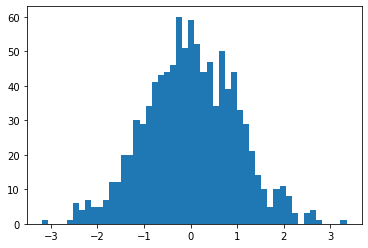

In [8]:
import matplotlib.pyplot as plt


norm = tf.random_normal([1000])
with tf.Session() as sess:
    norm_data=norm.eval()
plt.hist(norm_data, bins=50)
plt.show()

### matplotlib.pyplot.hist  
matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, \*, data=None, \*\*kwargs)  
[plt.hist 官网解释地址](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)  
<table>
<thead>
<tr>
<th>属性</th>
<th>说明</th>
<th>类型</th>
</tr>
</thead>
<tbody>
<tr>
<td>x</td>
<td>数据</td>
<td>数值类型</td>
</tr>
<tr>
<td>bins</td>
<td>条形数</td>
<td>int</td>
</tr>
<tr>
<td>color</td>
<td>颜色</td>
<td>"r","g","y","c"</td>
</tr>
<tr>
<td>density</td>
<td>是否以密度的形式显示</td>
<td>bool</td>
</tr>
<tr>
<td>range</td>
<td>x轴的范围</td>
<td>数值元组（起，终）</td>
</tr>
<tr>
<td>bottom</td>
<td>y轴的起始位置</td>
<td>数值类型</td>
</tr>
<tr>
<td>histtype</td>
<td>线条的类型</td>
<td>"bar":方形，"barstacked":柱形,&lt;br /&gt;"step":"未填充线条"&lt;br /&gt;"stepfilled":"填充线条"</td>
</tr>
<tr>
<td>align</td>
<td>对齐方式</td>
<td>"left":左，"mid":中间，"right":右</td>
</tr>
<tr>
<td>orientation</td>
<td>orientation</td>
<td>"horizontal":水平，"vertical":垂直</td>
</tr>
<tr>
<td>log</td>
<td>单位是否以科学计术法</td>
<td>bool</td>
</tr>
</tbody>
</table>
示例如下

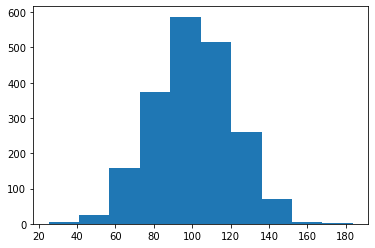

In [9]:
mu = 100
sigma = 20 
x = mu + sigma * np.random.randn(2000)
plt.hist(x=x, bins=10)
plt.show()

### tensorflow 中 softmax() 函数  
将输入值在整个值列表中映射到 0~1之间

In [10]:
x = np.array([-1.1, 2.2, 3.3, 9.6])
pred = tf.nn.softmax(x)
with tf.Session() as sess:
    probability = sess.run(pred)
print('x value:\n', x,
      '\nafter softmax value:\n', probability,
      '\nsum of probability:', sum(probability))

x value:
 [-1.1  2.2  3.3  9.6] 
after softmax value:
 [2.24893868e-05 6.09746624e-04 1.83178009e-03 9.97535984e-01] 
sum of probability: 1.0


## 正式开始
**本次模型为图像分类  
从预测问题到分类问题  
从线性回归到逻辑回归**

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import math
import matplotlib.pyplot as plt


mnist = input_data.read_data_sets('./mnist_dataset/', one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_dataset/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_dataset/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist_dataset/t10k-images-idx3-ubyte.gz
Extracting ./mnist_dataset/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [12]:
print('Number of training sets:', mnist.train.num_examples,
      '\nNumber of validation sets:', mnist.validation.num_examples,
      '\nNumber of test sets:', mnist.test.num_examples)

Number of training sets: 55000 
Number of validation sets: 5000 
Number of test sets: 10000


### 查看 train data

In [13]:
print('train images shape:', mnist.train.images.shape,
      '\nlabels shape:', mnist.train.labels.shape)

train images shape: (55000, 784) 
labels shape: (55000, 10)


一幅图像的维度与其值

In [14]:
print('Shape:', mnist.train.images[520].shape)
print('Value:', mnist.train.images[520])

Shape: (784,)
Value: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

随机显示图像 9 幅图像

In [15]:
def plot_num_images(num):
    if num < 1:
        print('INFO:The number of input pictures must be greater than zero!')
    else:
        choose_list = []
        for i in range(num):
            choose_n = np.random.randint(len(mnist.train.images))
            choose_list.append(choose_n)
        fig = plt.gcf()
        fig.set_size_inches(18, 5 * math.ceil(num / 3))
        for i in range(num):
            ax_img = plt.subplot(math.ceil(num / 3), 3, i + 1)
            plt_img = mnist.train.images[choose_list[i]].reshape(28, 28)
            ax_img.imshow(plt_img, cmap='binary')
            ax_img.set_title('label:' + str(np.argmax(mnist.train.labels[choose_list[i]])),
                             fontsize=10)
        plt.show()

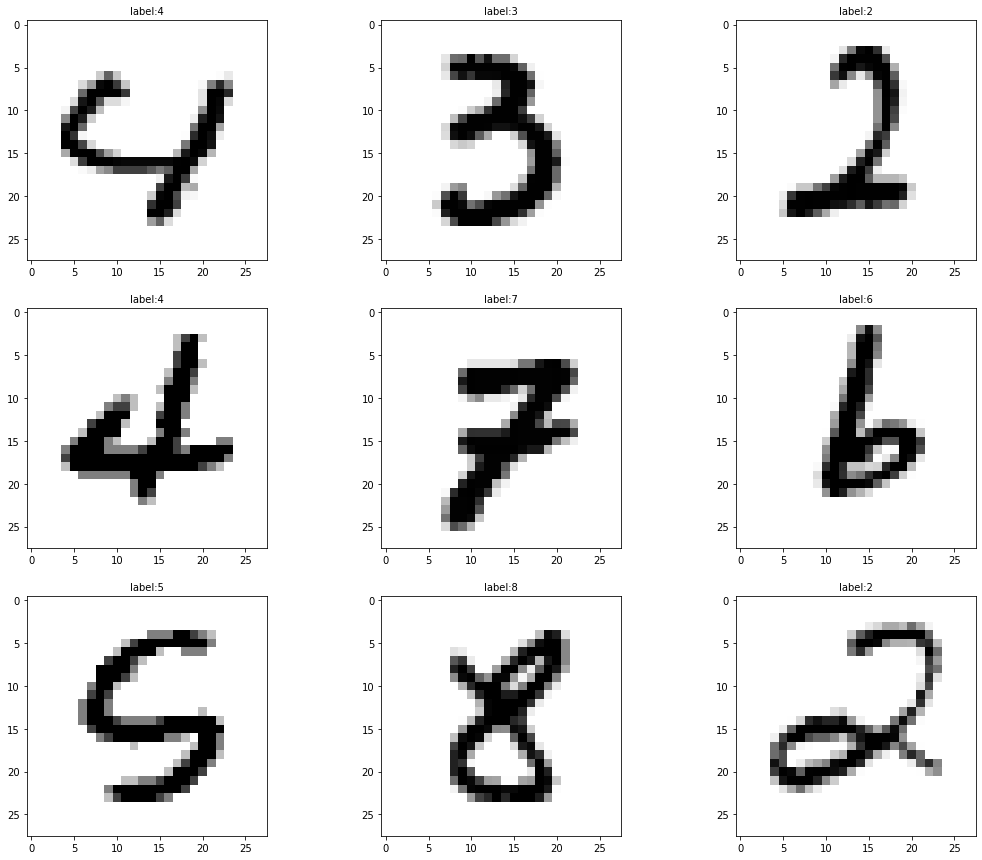

In [16]:
plot_num_images(9)

mnist 提供真实标签读取，显示 10 个数据

In [17]:
mnist_no_one_hot = input_data.read_data_sets('./mnist_dataset/', one_hot=False)
print(mnist_no_one_hot.train.labels[0:10])

Extracting ./mnist_dataset/train-images-idx3-ubyte.gz
Extracting ./mnist_dataset/train-labels-idx1-ubyte.gz
Extracting ./mnist_dataset/t10k-images-idx3-ubyte.gz
Extracting ./mnist_dataset/t10k-labels-idx1-ubyte.gz
[7 3 4 6 1 8 1 0 9 8]


### 模型构建
<img style="float: left;zoom:80%" src="pic/Neurons.png">
<img style="float: right;zoom:70%" src="pic/softmax.png">
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
使用单个神经元构建模型，将神经元的输出经过 softmax 层分类<br/><br/>
占位符

In [18]:
x = tf.placeholder(tf.float32, [None, 784], name='X')
y = tf.placeholder(tf.float32, [None, 10], name='Y')

变量

In [19]:
W = tf.Variable(tf.random_normal([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b')

In [20]:
forward = tf.matmul(x, W) + b
pred = tf.nn.softmax(forward)

### 训练模型
#### 设置训练参数

In [21]:
epochs = 50
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
display_step = 1
learning_rate = 0.01

#### 定义损失函数

In [22]:
loss_function = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))

#### 选择优化器

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

#### 定义准确率

In [24]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
sess = tf.Session()
loss_list = []
acc_list = []
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x:xs, y:ys})
    loss, acc = sess.run([loss_function, accuracy],
                         feed_dict={x:mnist.validation.images, y:mnist.validation.labels})
    loss_list.append(loss)
    acc_list.append(acc)
    if (epoch + 1) % display_step == 0:
        print('Epoch: %2d' % (epoch + 1), 'Loss= %6f' % loss, 'Accuracy=%4f' % acc)
print('INFO:Train Finished!')

Epoch:  1 Loss= 5.181013 Accuracy=0.289400
Epoch:  2 Loss= 3.226336 Accuracy=0.463000
Epoch:  3 Loss= 2.442250 Accuracy=0.557600
Epoch:  4 Loss= 2.023449 Accuracy=0.615400
Epoch:  5 Loss= 1.761311 Accuracy=0.662400
Epoch:  6 Loss= 1.580896 Accuracy=0.687800
Epoch:  7 Loss= 1.448330 Accuracy=0.714400
Epoch:  8 Loss= 1.344897 Accuracy=0.732200
Epoch:  9 Loss= 1.263207 Accuracy=0.748000
Epoch: 10 Loss= 1.195717 Accuracy=0.759400
Epoch: 11 Loss= 1.139762 Accuracy=0.770400
Epoch: 12 Loss= 1.091881 Accuracy=0.776400
Epoch: 13 Loss= 1.050353 Accuracy=0.783200
Epoch: 14 Loss= 1.014509 Accuracy=0.789000
Epoch: 15 Loss= 0.983110 Accuracy=0.794000
Epoch: 16 Loss= 0.954650 Accuracy=0.799000
Epoch: 17 Loss= 0.929542 Accuracy=0.804800
Epoch: 18 Loss= 0.906525 Accuracy=0.808400
Epoch: 19 Loss= 0.885733 Accuracy=0.811800
Epoch: 20 Loss= 0.866608 Accuracy=0.815400
Epoch: 21 Loss= 0.849514 Accuracy=0.819400
Epoch: 22 Loss= 0.833153 Accuracy=0.821600
Epoch: 23 Loss= 0.818339 Accuracy=0.826200
Epoch: 24 L

#### 损失与准确率可视化

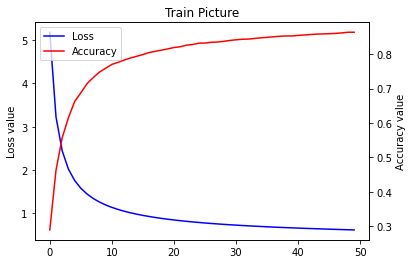

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Train Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(loss_list, color='b', label='Loss')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line2, = ax2.plot(acc_list, color='r', label='Accuracy')
plt.legend(handles=(line1, line2), loc='best')
plt.show()

### 模型评估
#### 测试集测试

In [27]:
acc_test = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
print('Test Accuracy:', acc_test)

Test Accuracy: 0.8624


#### 验证集测试

In [28]:
acc_valid = sess.run(accuracy, feed_dict={x:mnist.validation.images, y:mnist.validation.labels})
print('Test Accuracy:', acc_valid)

Test Accuracy: 0.8638


#### 训练集测试

In [29]:
acc_train = sess.run(accuracy, feed_dict={x:mnist.train.images, y:mnist.train.labels})
print('Test Accuracy:', acc_train)

Test Accuracy: 0.85856366


### 模型应用

In [30]:
def plot_apply_images(num):
    if num < 1:
        print('INFO:The number of input pictures must be greater than zero!')
    else:
        choose_list = []
        for i in range(num):
            choose_n = np.random.randint(len(mnist.test.images))
            choose_list.append(choose_n)
        fig = plt.gcf()
        fig.set_size_inches(18, 5 * math.ceil(num / 3))
        prediction_result = sess.run(tf.argmax(pred, 1), feed_dict={x:mnist.test.images})
        for i in range(num):
            ax_img = plt.subplot(math.ceil(num / 3), 3, i + 1)
            plt_img = mnist.test.images[choose_list[i]].reshape(28, 28)
            ax_img.imshow(plt_img, cmap='binary')
            ax_img.set_title('Original label:' \
                             + str(np.argmax(mnist.test.labels[choose_list[i]])) \
                             + ' Predict label:' \
                             + str(prediction_result[choose_list[i]]),
                             fontsize=10)
            ax_img.set_xticks([])
            ax_img.set_yticks([])
        plt.show()

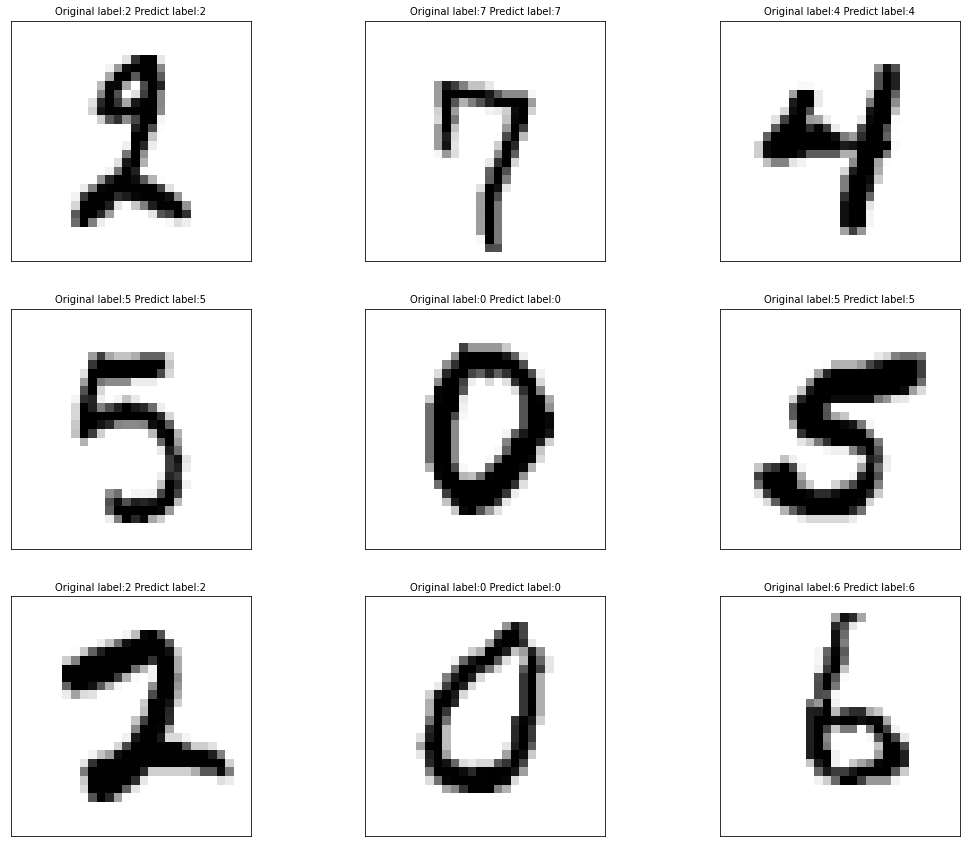

In [31]:
plot_apply_images(9)